In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import MicroTools as micro
from MicroTools import plot_tools as pt
import MiniTools as mini
import MicroTools.param_scan as param_scan

In [28]:
dic_osc_app = param_scan.load_scan_data('fit_data/MH_apponly.pkl')
dic_osc_full = param_scan.load_scan_data('fit_data/MH_numu_MC_keep_numu_norm.pkl')
dic_dec_full = param_scan.load_scan_data('fit_data/MH_decay_test_30.pkl')

bf_osc_app = param_scan.get_best_fit_point(dic_osc_app)
bf_osc_full = param_scan.get_best_fit_point(dic_osc_full)
bf_dec_full = param_scan.get_best_fit_point(dic_dec_full)

In [29]:
params_no_osc = {'g': 1e-10, 'Ue4Sq': 1e-10, 'Um4Sq': 1e-10, 'm4': 1}
rates_no_osc = param_scan.get_nue_rates(params_no_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)


params_BEST_osc = {'g': 1e-5, 'Ue4Sq': 0.1, 'Um4Sq': 1e-2, 'm4': 1}
params_BEST_dec = {'g': 1, 'Ue4Sq': 0.1, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_BEST = param_scan.get_nue_rates(params_BEST_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_BEST = param_scan.get_nue_rates(params_BEST_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

params_solar_osc = {'g': 1e-3, 'Ue4Sq': 0.05, 'Um4Sq': 2e-2, 'm4': 1}
params_solar_dec = {'g': 1, 'Ue4Sq': 0.05, 'Um4Sq': 3e-3, 'm4': 1e3}
rates_dic_osc_solar = param_scan.get_nue_rates(params_solar_osc, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_decay_solar = param_scan.get_nue_rates(params_solar_dec, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

rates_dic_bf_osc_full = param_scan.get_nue_rates(bf_osc_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=False, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=1, undo_numu_normalization=False)
rates_dic_bf_dec_full = param_scan.get_nue_rates(bf_dec_full, oscillations=True, use_numu_MC=True, include_antineutrinos=True, decay=True, decouple_decay=False, disappearance=True, energy_degradation=True, n_replications=10, undo_numu_normalization=False)

In [36]:
H = 'conserving'
params_hugeUe4_osc = {'g': 1e-10, 'Ue4Sq': 0.5, 'Um4Sq': 1e-6, 'm4': 1e3}
params_hugeUe4_dec = {'g': 10000, 'Ue4Sq': 0.5, 'Um4Sq': 1e-6, 'm4': 1e3}
params_medUe4_dec = {'g': 10000, 'Ue4Sq': 0.25, 'Um4Sq': 1e-6, 'm4': 1e3}
params_smallUe4_dec = {'g': 10000, 'Ue4Sq': 0.01, 'Um4Sq': 1e-6, 'm4': 1e3}

kwargs_osc = {"oscillations": True, "use_numu_MC": True, "include_antineutrinos": True, "decay": False, "decouple_decay": False, "disappearance": True, "energy_degradation": False, "n_replications": 1, "undo_numu_normalization": False}
kwargs_decay = {"oscillations": True, "use_numu_MC": True, "include_antineutrinos": True, "decay": True, "decouple_decay": False, "disappearance": True, "energy_degradation": True, "n_replications": 10, "undo_numu_normalization": False}

rates_dic_osc_hugeUe4_HC = param_scan.get_nue_rates(params_hugeUe4_osc, helicity='conserving', **kwargs_osc)
rates_dic_decay_hugeUe4_HC = param_scan.get_nue_rates(params_hugeUe4_dec, helicity='conserving', **kwargs_decay)
rates_dic_decay_medUe4_HC = param_scan.get_nue_rates(params_medUe4_dec, helicity='conserving', **kwargs_decay)
rates_dic_decay_smallUe4_HC = param_scan.get_nue_rates(params_smallUe4_dec, helicity='conserving', **kwargs_decay)

rates_dic_osc_hugeUe4_HF = param_scan.get_nue_rates(params_hugeUe4_osc, helicity='flipping', **kwargs_osc)
rates_dic_decay_hugeUe4_HF = param_scan.get_nue_rates(params_hugeUe4_dec, helicity='flipping', **kwargs_decay)
rates_dic_decay_medUe4_HF = param_scan.get_nue_rates(params_medUe4_dec, helicity='flipping', **kwargs_decay)
rates_dic_decay_smallUe4_HF = param_scan.get_nue_rates(params_smallUe4_dec, helicity='flipping', **kwargs_decay)


In [39]:
rates_dic_decay_hugeUe4_HF = param_scan.get_nue_rates(params_hugeUe4_dec, helicity='flipping', **kwargs_decay)

(<Figure size 396x252 with 1 Axes>,
 <Axes: xlabel='Reconstructed $E_\\nu^{\\rm QE}$ (GeV)', ylabel='Events/MeV'>)

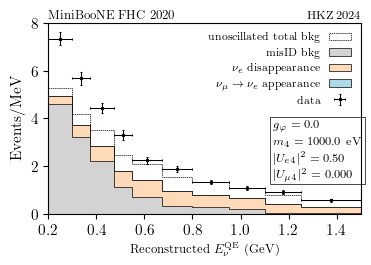

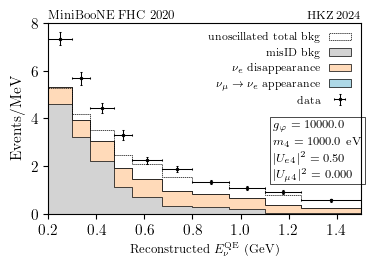

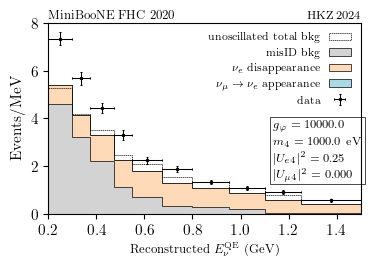

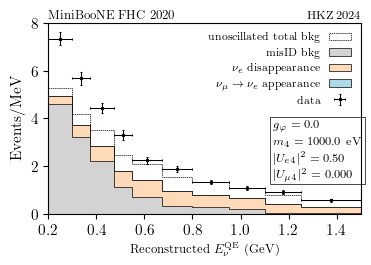

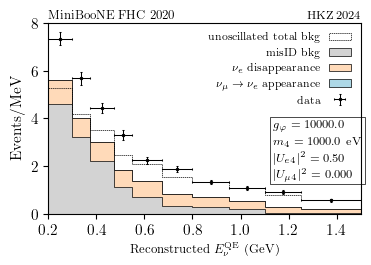

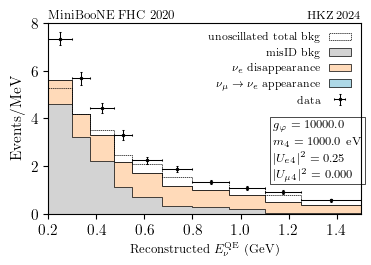

In [34]:
pt.make_rate_plot(rates_dic_osc_hugeUe4_HC, params_hugeUe4_osc, '3+1_osc_hugeUe4_HC')
pt.make_rate_plot(rates_dic_decay_hugeUe4_HC, params_hugeUe4_dec, '3+1_dec_hugeUe4_HC')
pt.make_rate_plot(rates_dic_decay_medUe4_HC, params_medUe4_dec, '3+1_dec_medUe4_HC')

pt.make_rate_plot(rates_dic_osc_hugeUe4_HF, params_hugeUe4_osc, '3+1_osc_hugeUe4_HF')
pt.make_rate_plot(rates_dic_decay_hugeUe4_HF, params_hugeUe4_dec, '3+1_dec_hugeUe4_HF')
pt.make_rate_plot(rates_dic_decay_medUe4_HF, params_medUe4_dec, '3+1_dec_medUe4_HF')


/Users/mhostert/Repos/muB_oscillation/MicroTools/sterile_tools.py:642: RuntimeWarning: invalid value encountered in divide
  np.where(xsec_nu4 > 0, Xsec(Edaughter) / xsec_nu4, 0)
/Users/mhostert/Repos/muB_oscillation/MicroTools/sterile_tools.py:642: RuntimeWarning: invalid value encountered in divide
  np.where(xsec_nu4 > 0, Xsec(Edaughter) / xsec_nu4, 0)
/Users/mhostert/Repos/muB_oscillation/MicroTools/sterile_tools.py:642: RuntimeWarning: invalid value encountered in divide
  np.where(xsec_nu4 > 0, Xsec(Edaughter) / xsec_nu4, 0)


(<Figure size 396x240 with 1 Axes>,
 <Axes: xlabel='Reconstructed $E_\\nu^{\\rm QE}$ (GeV)', ylabel='Events/MeV'>)

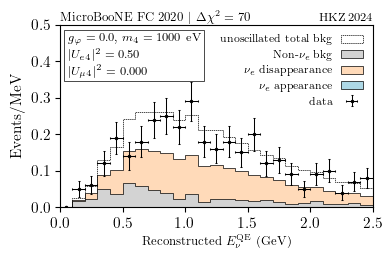

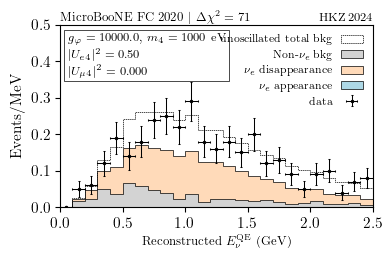

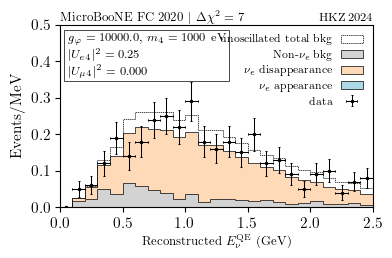

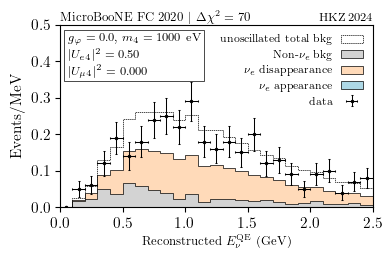

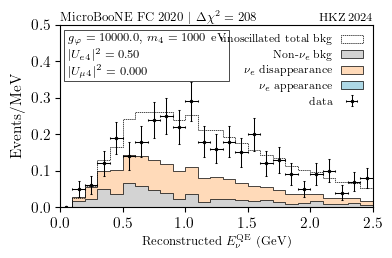

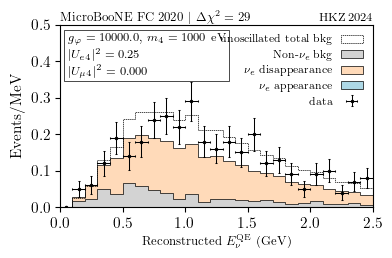

In [44]:
pt.make_micro_rate_plot(rates_dic_osc_hugeUe4_HC, params_hugeUe4_osc, '3+1_osc_hugeUe4_HC')
pt.make_micro_rate_plot(rates_dic_decay_hugeUe4_HC, params_hugeUe4_dec, '3+1_dec_hugeUe4_HC')
pt.make_micro_rate_plot(rates_dic_decay_medUe4_HC, params_medUe4_dec, '3+1_dec_medUe4_nodeg_HC')

pt.make_micro_rate_plot(rates_dic_osc_hugeUe4_HF, params_hugeUe4_osc, '3+1_osc_hugeUe4_HF', helicity='flipping')
pt.make_micro_rate_plot(rates_dic_decay_hugeUe4_HF, params_hugeUe4_dec, '3+1_dec_hugeUe4_HF', helicity='flipping')
pt.make_micro_rate_plot(rates_dic_decay_medUe4_HF, params_medUe4_dec, '3+1_dec_medUe4_nodeg_HF', helicity='flipping')

In [11]:
import scipy.special as sc


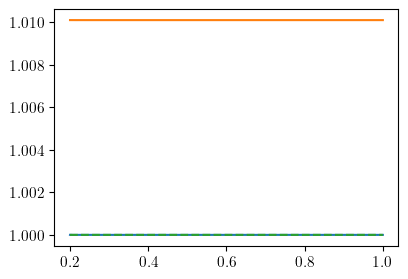

In [374]:
dic = {'g': 3, 'Ue4Sq': 0.2, 'Um4Sq': 0.1, 'm4': 10.0}
sterile = Sterile(
dic,
oscillations=True,
decay=True,
decouple_decay=False,
CP=+1,
)

L = np.linspace(0.2, 1, 200000)
# plt.plot(L, sterile.Fosc_crossterm(0.125, L))
# # plt.plot(L, sterile.FoscAvg_crossterm_numerical(0.1, 0.15, L))
# plt.plot(L, sterile.FoscAvg_crossterm_analytical(0.1, 0.15, L), ls='--')

plt.plot(L, sterile.Fosc(0.15, L))
plt.plot(L, sterile.FoscAvg_numerical(0.1, 0.2, L))
plt.plot(L, sterile.FoscAvg_analytical(0.1, 0.2, L), ls='--')

In [358]:
%%time
# sterile.FoscAvg_crossterm(0.1, 0.15, L)
# sterile.FoscAna_crossterm(0.1, 0.15, L)

# sterile.FoscAvg_analytical(0.1, 0.15, L)
sterile.FoscAvg_numerical(0.1, 0.15, L)

CPU times: user 328 ms, sys: 58.6 ms, total: 386 ms
Wall time: 393 ms


array([1.01010096, 1.01010096, 1.01010096, ..., 1.01010101, 1.01010101,
       1.01010101])

## MiniBooNE nu_e sample

In [43]:
# import the necessary module
# define the chi-square probability
pval, pval_nu = mini.fit.get_pval(rates_dic_decay_solar, ndof=38 - 2), mini.fit.get_pval(rates_dic_decay_solar, ndof=38/2 - 1)

# calculate the number of standard deviations # NOTE: lazy... I can't remember how to relate the two....
# std_devs, std_devs_nu = np.sqrt(scipy.stats.chi2.ppf(1-pval, 38-2)), np.sqrt(scipy.stats.chi2.ppf(1-pval_nu, 38/2-1))
print(pval, pval_nu)

0.2850762897376868 0.0018884870233725108


(<Figure size 396x240 with 1 Axes>,
 <Axes: xlabel='Reconstructed $E_\\nu^{\\rm QE}$ (GeV)', ylabel='Events/MeV'>)

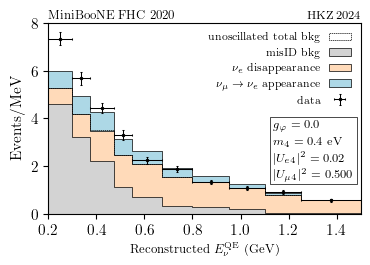

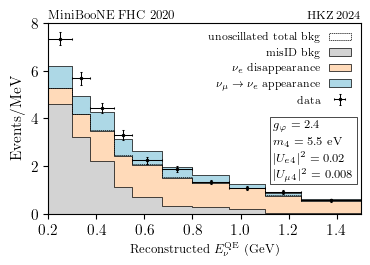

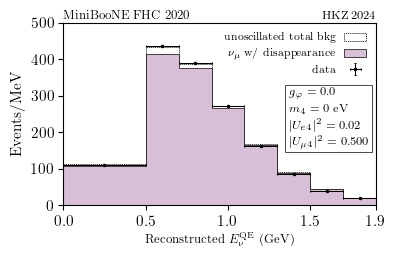

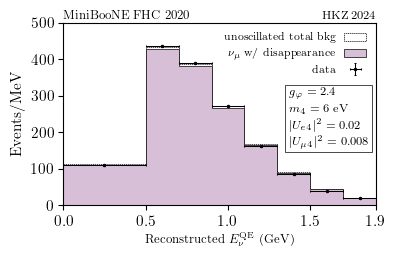

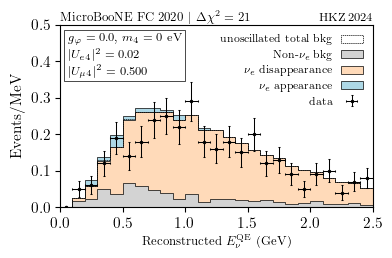

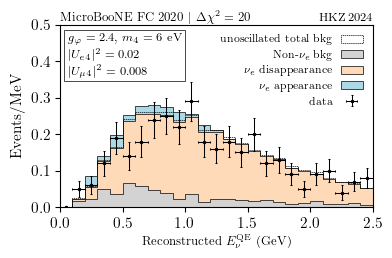

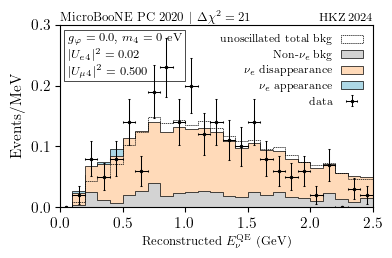

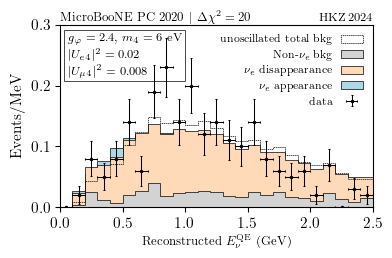

In [9]:
pt.make_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
pt.make_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

pt.make_numu_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
pt.make_numu_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

pt.make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf')
pt.make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf')

pt.make_micro_rate_plot(rates_dic_bf_osc_full, bf_osc_full, '3+1_osc_bf', PC=True)
pt.make_micro_rate_plot(rates_dic_bf_dec_full, bf_dec_full, '3+1_dec_bf', PC=True)

(<Figure size 396x252 with 1 Axes>,
 <Axes: xlabel='Reconstructed $E_\\nu^{\\rm QE}$ (GeV)', ylabel='Events/MeV'>)

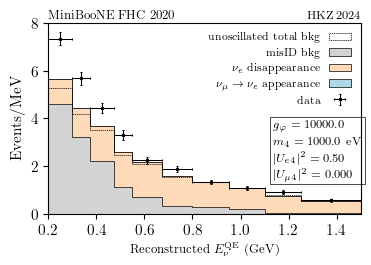

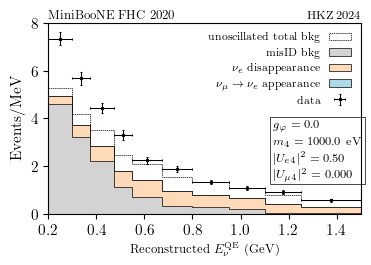

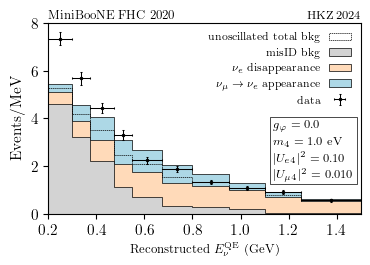

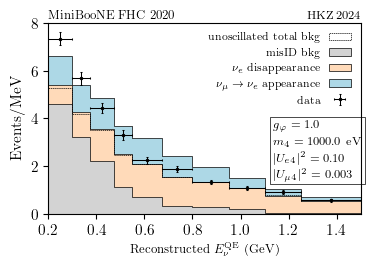

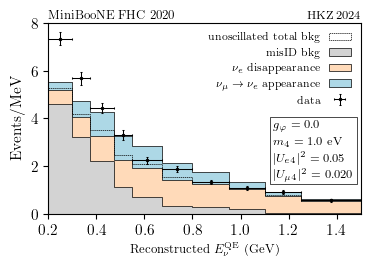

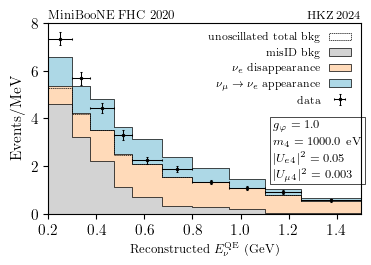

In [10]:
pt.make_rate_plot(rates_dic_decay_hugeUe4, params_hugeUe4_dec, '3+1_dec_hugeUe4')
pt.make_rate_plot(rates_dic_osc_hugeUe4, params_hugeUe4_osc, '3+1_osc_hugeUe4')

pt.make_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_BEST')
pt.make_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')

pt.make_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
pt.make_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

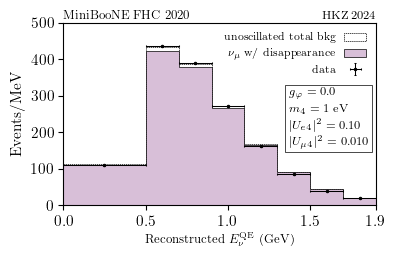

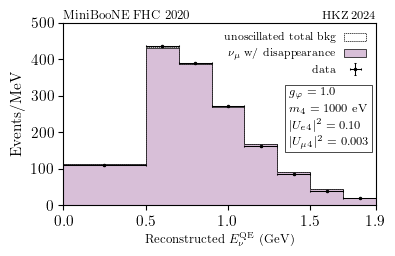

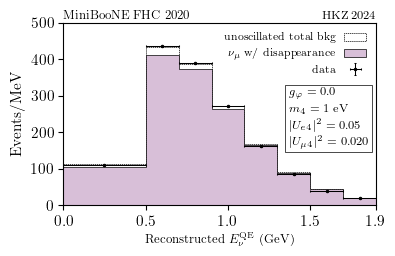

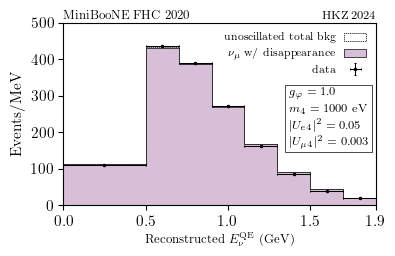

In [46]:
pt.make_numu_rate_plot(rates_dic_osc_BEST, params_BEST_osc, '3+1_osc_BEST')
pt.make_numu_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')

pt.make_numu_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
pt.make_numu_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_solar')

## MicroBooNE Rates

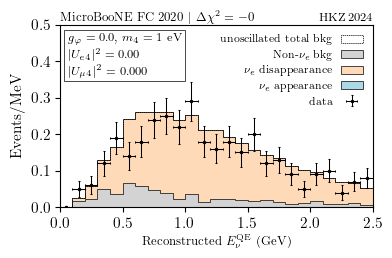

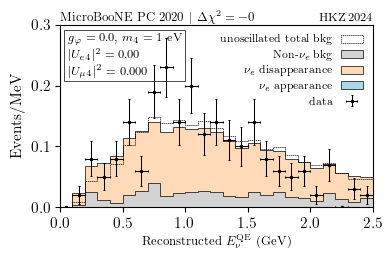

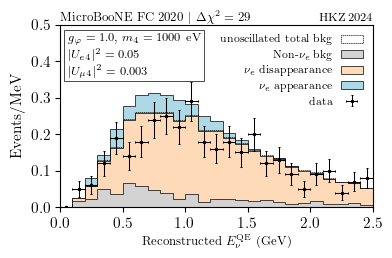

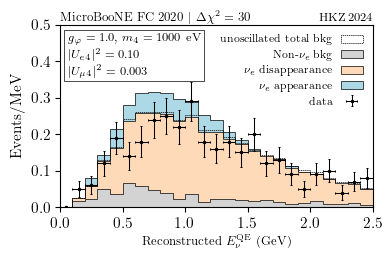

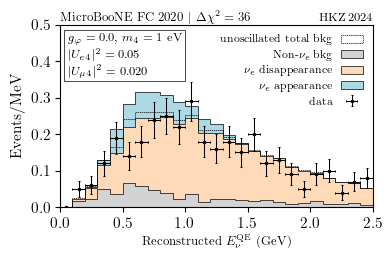

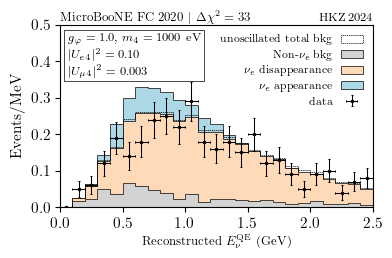

In [47]:
pt.make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc')
pt.make_micro_rate_plot(rates_no_osc, params_no_osc, 'No osc', PC=True)

pt.make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST')
# pt.make_micro_rate_plot(rates_dic_decay_solar, params_solar_dec, '3+1_dec_BEST', PC=True)

pt.make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST')
# pt.make_micro_rate_plot(rates_dic_decay_BEST, params_BEST_dec, '3+1_dec_BEST', PC=True)

pt.make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar')
# pt.make_micro_rate_plot(rates_dic_osc_solar, params_solar_osc, '3+1_osc_solar', PC=True)

pt.make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST')
# pt.make_micro_rate_plot(rates_dic_osc_BEST, params_BEST_dec, '3+1_osc_BEST', PC=True)